<a href="https://colab.research.google.com/github/fnavab/APS360-project/blob/main/24k_RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Data loading
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import random
import torchvision.transforms as transforms
import torch
import numpy as np
import os
import torchvision
from torch.utils.data.sampler import SubsetRandomSampler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

In [3]:
  train_dir = '/content/gdrive/My Drive/Colab Notebooks/24k_features/train'
  trainset = torchvision.datasets.DatasetFolder(train_dir, loader=torch.load, extensions=('.tensor'))

In [4]:
test_dir = '/content/gdrive/My Drive/Colab Notebooks/24k_features/test'

test_set = torchvision.datasets.DatasetFolder(test_dir, loader=torch.load, extensions=('.tensor'))

In [5]:
val_dir = '/content/gdrive/My Drive/Colab Notebooks/24k_features/val'
val_set= torchvision.datasets.DatasetFolder(val_dir, loader=torch.load, extensions=('.tensor'))


In [6]:
len(test_set)

4267

In [7]:
len(val_set)

4234

In [8]:
len(trainset)

15851

In [9]:
X_test = np.array([x.numpy() for x,_ in test_set])
y_test= np.array([y for _,y in test_set])

X_test = X_test.reshape((X_test.shape[0], -1))


In [10]:
X_val = np.array([x.numpy() for x,_ in val_set])
y_val= np.array([y for _,y in val_set])

X_val = X_val.reshape((X_val.shape[0],-1))

In [11]:

X_train = np.array([x.numpy() for x,_ in trainset])
y_train= np.array([y for _,y in trainset])

X_train = X_train.reshape((X_train.shape[0],-1))


In [12]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix

#TUNE n_estimators
model = RandomForestClassifier(n_estimators=200, criterion="entropy")

# Fit the model to our training data
classifier=model.fit(X_train, y_train)

val_predicted = model.predict(X_val)
score=accuracy_score(val_predicted,y_val)

print("RF Validation Score:", score)






RF Validation Score: 0.7366556447803495


In [13]:
# # Make predictions
testing_predicted = model.predict(X_test)
score=accuracy_score(testing_predicted,y_test)
print("RF Test:", score)

RF Test: 0.740098429810171


Confusion matrix, without normalization
[[460  22   2   9  12   2  15  12]
 [ 34 393   0   4  22  14  15  41]
 [  8   8 420  82   1  13  11   2]
 [  7  12  96 371   4  21  18   5]
 [ 25  46   3   3 344  18  32  73]
 [  1   3  13  14   3 473  61   4]
 [ 16  11  10  22   2  84 343   9]
 [ 29  64   1   8  48   9  20 339]]
Normalized confusion matrix
[[0.86 0.04 0.   0.02 0.02 0.   0.03 0.02]
 [0.07 0.75 0.   0.01 0.04 0.03 0.03 0.08]
 [0.01 0.01 0.77 0.15 0.   0.02 0.02 0.  ]
 [0.01 0.02 0.18 0.69 0.01 0.04 0.03 0.01]
 [0.05 0.08 0.01 0.01 0.63 0.03 0.06 0.13]
 [0.   0.01 0.02 0.02 0.01 0.83 0.11 0.01]
 [0.03 0.02 0.02 0.04 0.   0.17 0.69 0.02]
 [0.06 0.12 0.   0.02 0.09 0.02 0.04 0.65]]


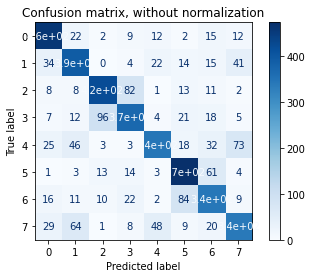

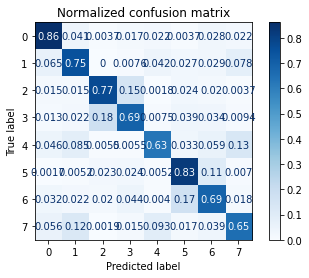

In [16]:

from sklearn.metrics import plot_confusion_matrix
# Run classifier, using a model that is too regularized (C too low) to see
# the impact on the results

class_names=[0,1,2,3,4,5,6,7]
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(classifier, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

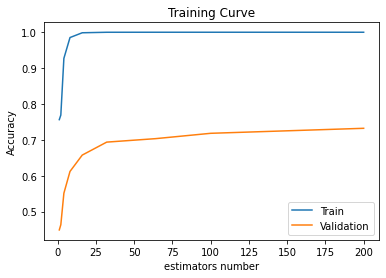

In [ ]:
n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200]
train_results = []
val_results = []
for estimator in n_estimators:
   rf = RandomForestClassifier(n_estimators=estimator, criterion="entropy")
   rf.fit(X_train, y_train)
   train_pred = rf.predict(X_train)
   train_score=accuracy_score(train_pred,y_train)
   train_results.append(train_score)
   val_pred = rf.predict(X_val)
   val_score=accuracy_score(val_pred,y_val)
   val_results.append(val_score)


plt.title("Training Curve")
plt.plot(n_estimators, train_results, label="Train")
plt.plot(n_estimators, val_results, label="Validation")
plt.xlabel("estimators number")
plt.ylabel("Accuracy")
plt.legend(loc='best')
plt.show() 


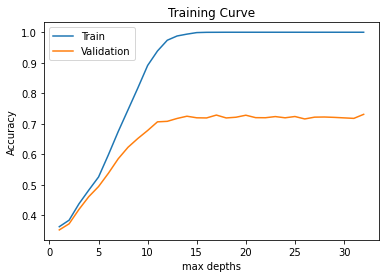

In [ ]:
max_depths = np.linspace(1, 32, 32, endpoint=True)

train_results = []
val_results = []
for max_depth in max_depths:
   rf = RandomForestClassifier(n_estimators=100, criterion="entropy", max_depth=max_depth)
   rf.fit(X_train, y_train)
   train_pred = rf.predict(X_train)
   train_score=accuracy_score(train_pred,y_train)
   train_results.append(train_score)
   val_pred = rf.predict(X_val)
   val_score=accuracy_score(val_pred,y_val)
   val_results.append(val_score)


plt.title("Training Curve")
plt.plot(max_depths, train_results, label="Train")
plt.plot(max_depths, val_results, label="Validation")
plt.xlabel("max depths")
plt.ylabel("Accuracy")
plt.legend(loc='best')
plt.show() 